In [3]:
# Import Standard Libraries
import pathlib
import sqlite3
import statistics

In [4]:
# Import External Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import jupyterlab
import pyarrow

In [35]:
# Query to create data set to explore
conn = sqlite3.connect('olympics.db')

data_source = pd.read_sql(
    'SELECT ID as athlete_id, Name as athlete_name, Sex as gender, age, team, athletes.noc, games, year, season, city, sport, event, medal,region FROM athletes INNER JOIN countries ON athletes.noc = countries.noc', 
    conn, index_col=['athlete_id'])

# print(data_source.head())

# Initial Data Inspection
```
Displaying the first 5 records of the joined data set
of athlete events and countries.

The descriptive statistics show the average age for
the Olympic athletes in the dataset is 25.6 years old.
The youngest athlete is 10 and the oldest athlete is 97.

The first Olympic year in the dataset is 1896 and the most
recent year is 2016.
```

In [139]:
print(data_source.head(5))
print(data_source.shape)

print(data_source.describe())

                        athlete_name gender   Age            Team  NOC  \
athlete_id                                                               
1                          A Dijiang      M  24.0           China  CHN   
2                           A Lamusi      M  23.0           China  CHN   
3                Gunnar Nielsen Aaby      M  24.0         Denmark  DEN   
4               Edgar Lindenau Aabye      M  34.0  Denmark/Sweden  DEN   
5           Christine Jacoba Aaftink      F  21.0     Netherlands  NED   

                  Games  Year  Season       City          Sport  \
athlete_id                                                        
1           1992 Summer  1992  Summer  Barcelona     Basketball   
2           2012 Summer  2012  Summer     London           Judo   
3           1920 Summer  1920  Summer  Antwerpen       Football   
4           1900 Summer  1900  Summer      Paris     Tug-Of-War   
5           1988 Winter  1988  Winter    Calgary  Speed Skating   

           

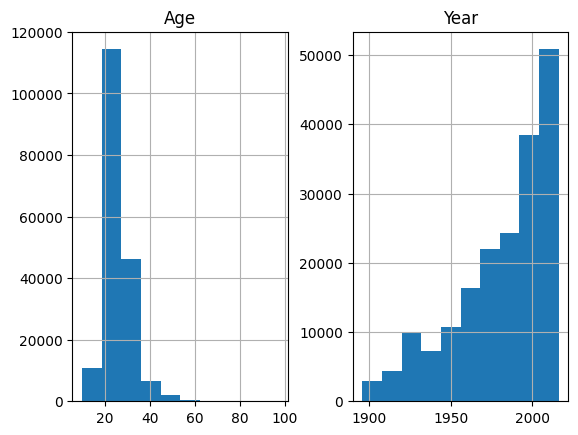

In [7]:
# Initial Plots
df = pd.read_sql(
    'SELECT DISTINCT ID as athlete_id, Sex as gender, age, region, year, season FROM athletes INNER JOIN countries ON athletes.noc = countries.noc', 
    conn, index_col=['athlete_id'])

# print(plot_source.head())

df.hist()
plt.show()

# Histograms
```
Most athletes are in the 20-40 year age range.
The number of athletes has increased almost
exponentially over time.
```

<Figure size 4000x4000 with 0 Axes>

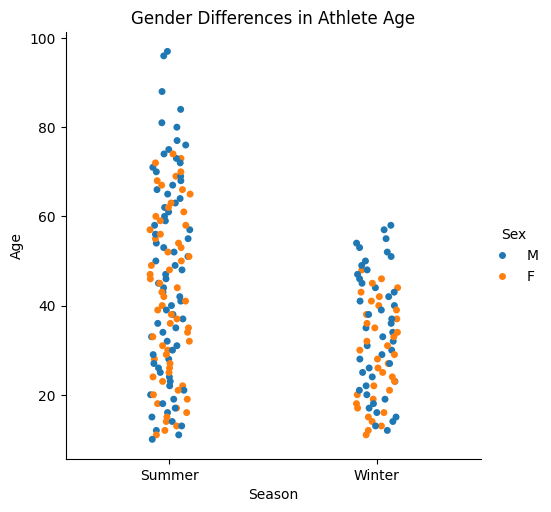

In [81]:
query = '''SELECT DISTINCT Season, Sex, Age
FROM athletes
'''

df = pd.read_sql(query, conn)

plt.figure(figsize=(40, 40))
sns.catplot(data=df,
             x='Season',
             y='Age',
             hue='Sex',
             jitter=True
             )

plt.title("Gender Differences in Athlete Age")
plt.show()


# Gender Age Differences by Season
```
The Summer Olympic games bring a larger age group
range.  The oldest age for females in the Summer games
is 70's while the oldest age for males is up to nearly
100.

There isn't as big of an age gap in the Winter games
when comparing females to males.  Additionally, the
Winter games bring younger athletes with the oldest
athletes being around 60.
```

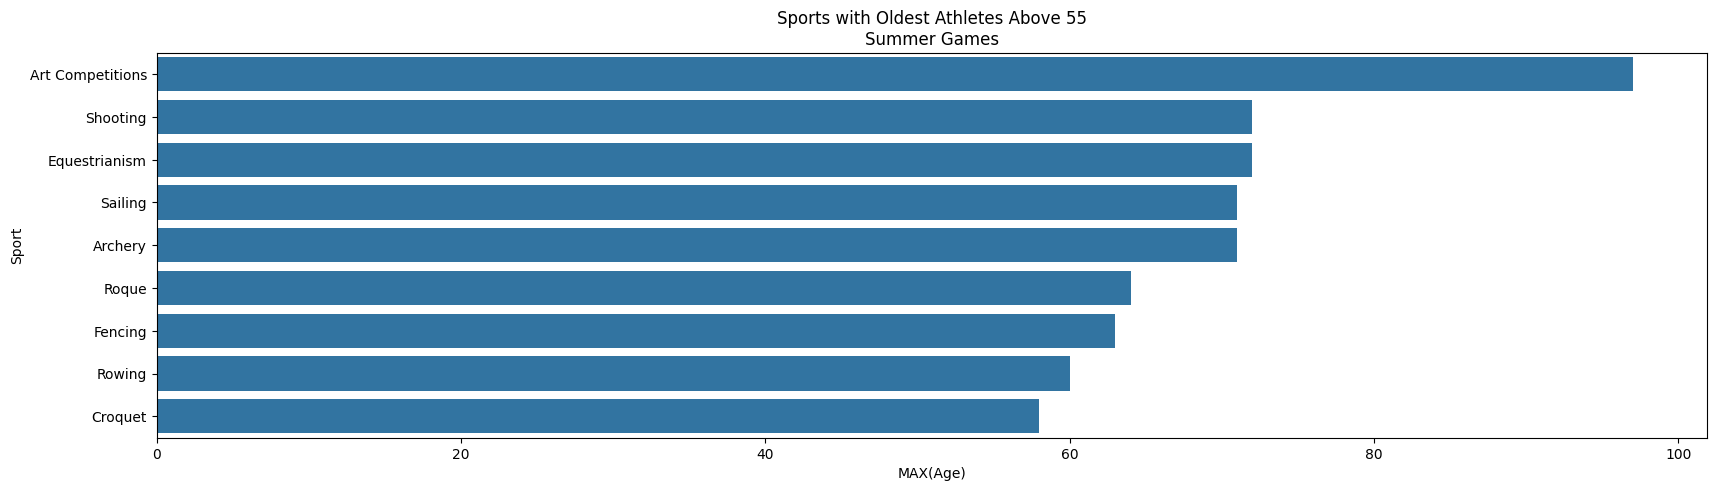

In [98]:
query = '''SELECT DISTINCT Season, Sex, MAX(Age), Sport
FROM athletes
WHERE Season='Summer' and Age > 55
GROUP BY Sport
ORDER BY Age DESC
'''

df = pd.read_sql(query, conn)

plt.figure(figsize=(20, 5))
sns.barplot(data=df,
             x='MAX(Age)',
             y='Sport',
             )

plt.title("Sports with Oldest Athletes Above 55\nSummer Games")
plt.show()


# Older Athletes - Summer Games
```
Looking further into the older athletes for the summer games,
Art Competitions brings the oldest athletes, followed by
Shooting and Equestrianism.
```

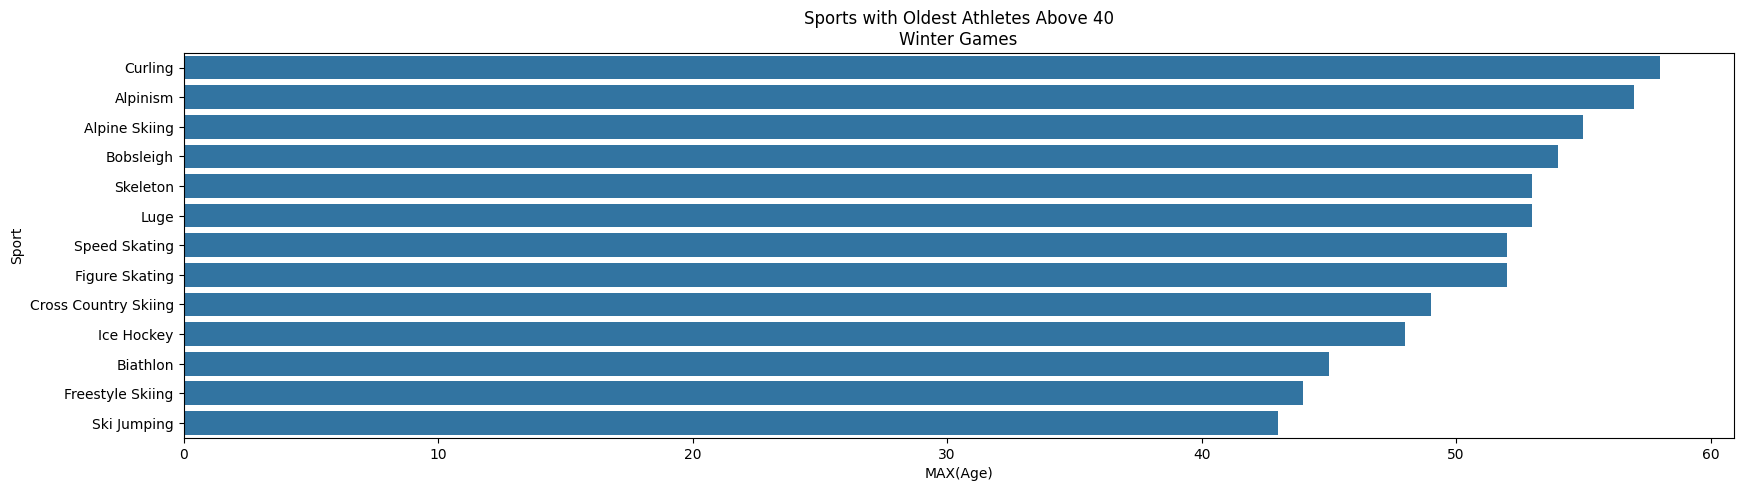

In [99]:
query = '''SELECT DISTINCT Season, Sex, MAX(Age), Sport
FROM athletes
WHERE Season='Winter' and Age > 40
GROUP BY Sport
ORDER BY Age DESC
'''

df = pd.read_sql(query, conn)

plt.figure(figsize=(20, 5))
sns.barplot(data=df,
             x='MAX(Age)',
             y='Sport',
             )

plt.title("Sports with Oldest Athletes Above 40\nWinter Games")
plt.show()


#  Older Athletes - Winter Games
```
In looking at a similar view for the Winter Games,
the max age needed to go down to 40 in order to get
a similar amount of sports.  The oldest athletes in
the Winter games participate in Curling, followed by
Alpinism and Alpine Skiing.
```

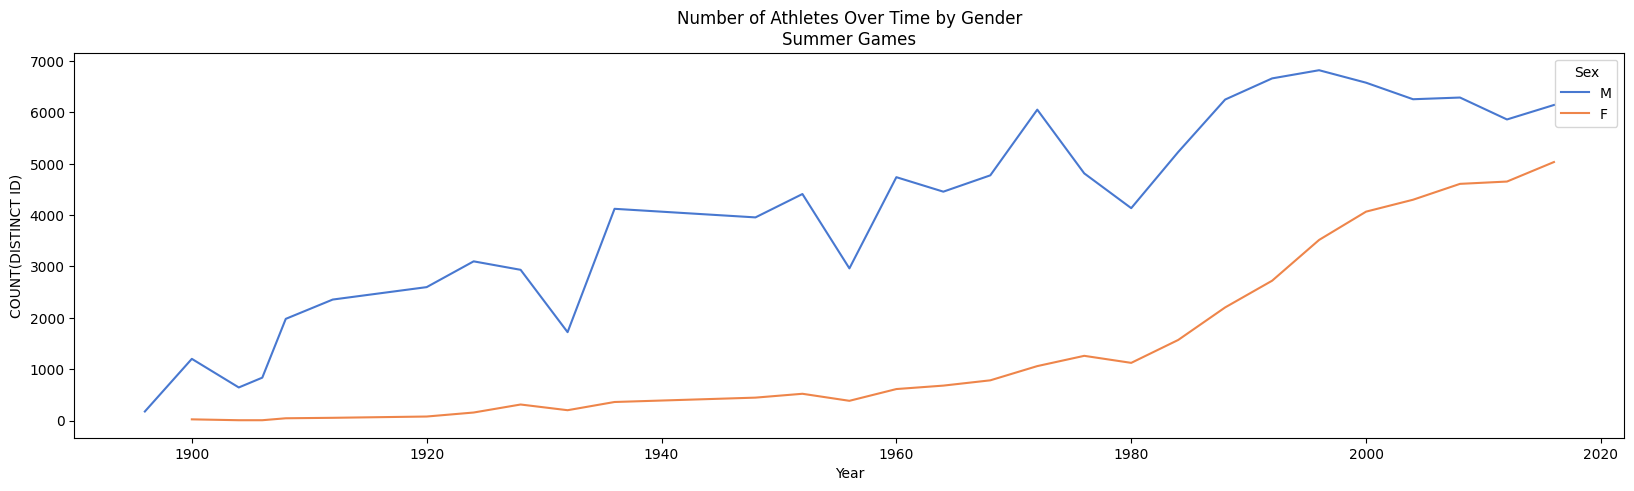

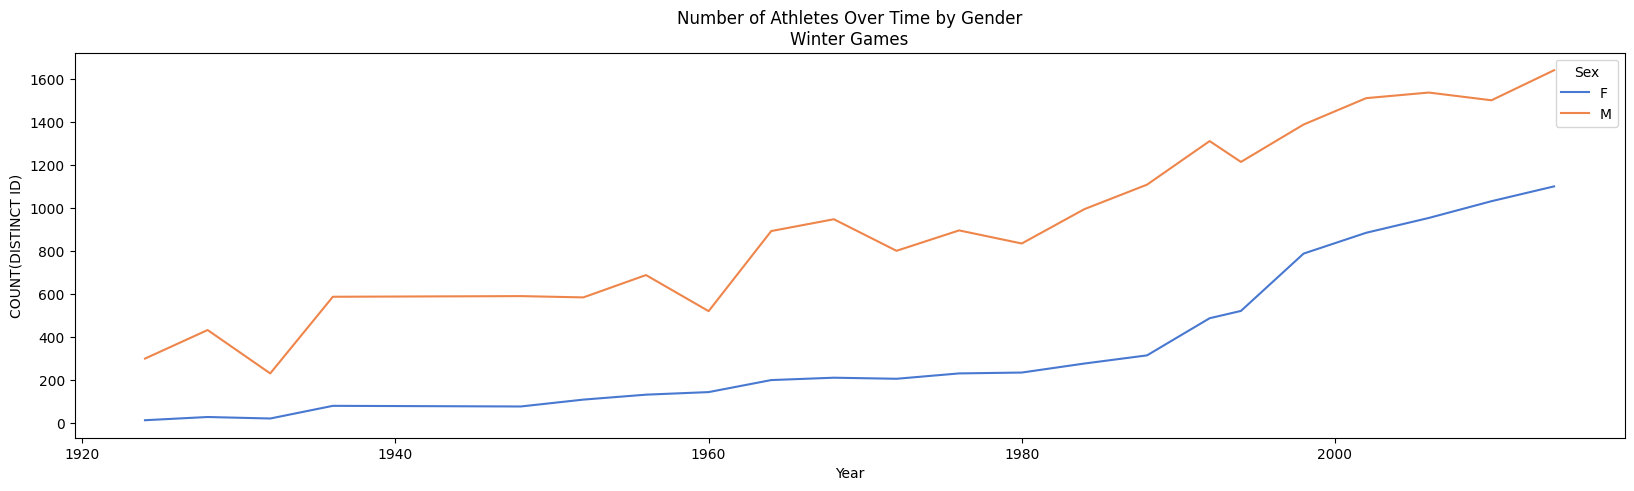

In [119]:
query = '''SELECT Year, Sex, COUNT(DISTINCT ID)
FROM athletes
WHERE Season='Summer'
GROUP BY Year, Sex
'''

df = pd.read_sql(query, conn)
# print(df.head)

plt.figure(figsize=(20, 5))

sns.lineplot(data=df,
             x='Year',
             y='COUNT(DISTINCT ID)',
             hue='Sex',
             palette='muted'
             )

plt.title("Number of Athletes Over Time by Gender\nSummer Games")
plt.show()


query = '''SELECT Year, Sex, COUNT(DISTINCT ID)
FROM athletes
WHERE Season='Winter'
GROUP BY Year, Sex
'''

df = pd.read_sql(query, conn)
# print(df.head)

plt.figure(figsize=(20, 5))

sns.lineplot(data=df,
             x='Year',
             y='COUNT(DISTINCT ID)',
             hue='Sex',
             palette='muted'
             )

plt.title("Number of Athletes Over Time by Gender\nWinter Games")
plt.show()


# Athlete Participation by Gender Over Time
```
The Olympic games have historically had more male
participation compared to female participation in 
both the Summer and Winter games.  However, the
participation of females is growing and the gap
is closing.
```

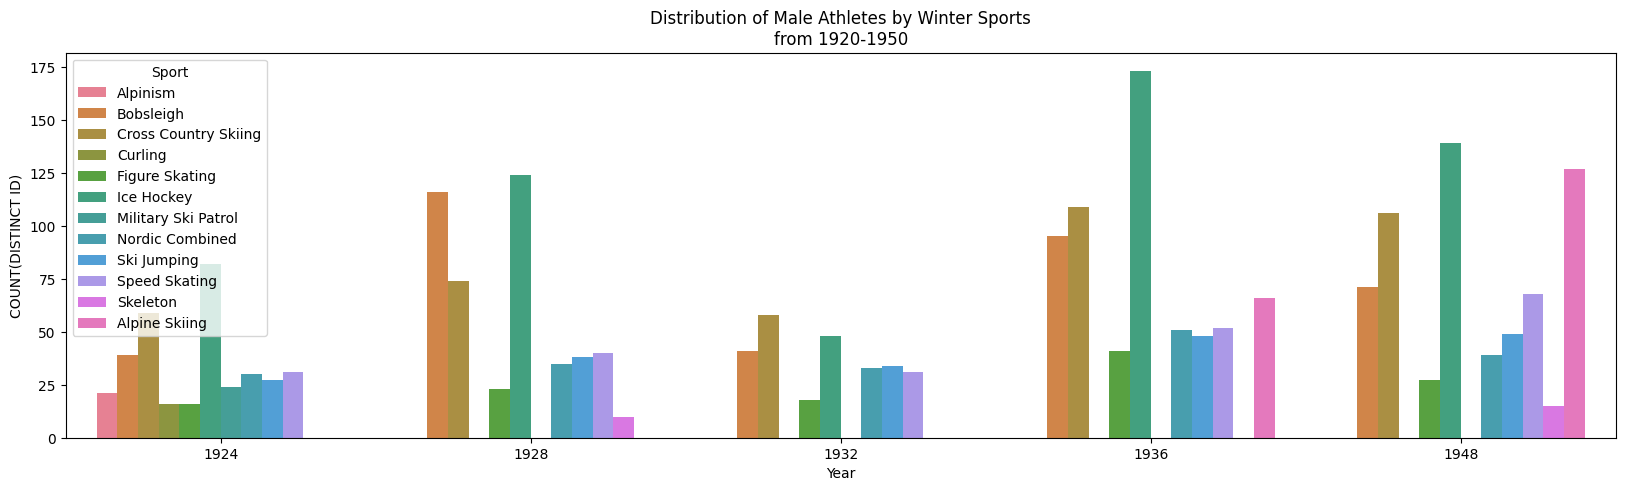

In [128]:
query='''SELECT Sex, Season, Year, Sport, COUNT(DISTINCT ID)
FROM athletes
WHERE Season='Winter' AND Sex='M' AND (Year > 1920 and Year < 1950)
GROUP BY Year, Sport
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(20, 5))

sns.barplot(data=df,
             x='Year',
             y='COUNT(DISTINCT ID)',
             hue='Sport',
             )

plt.title("Distribution of Male Athletes by Winter Sports\nfrom 1920-1950")
plt.show()

# Male Participation - Winter Games 1920-1950
```
The previous graphs showed dips in participation for the males.
This graph focuses in on the years of 1924 - 1948.  It appears
that Military Ski Patrol was dropped as a sport starting in 1928.
Participation was low in 1932 during the depression.  The gap from 
1936 to 1948 due to war.

This graph also shows the start of Alpine Skiing in 1936.
```

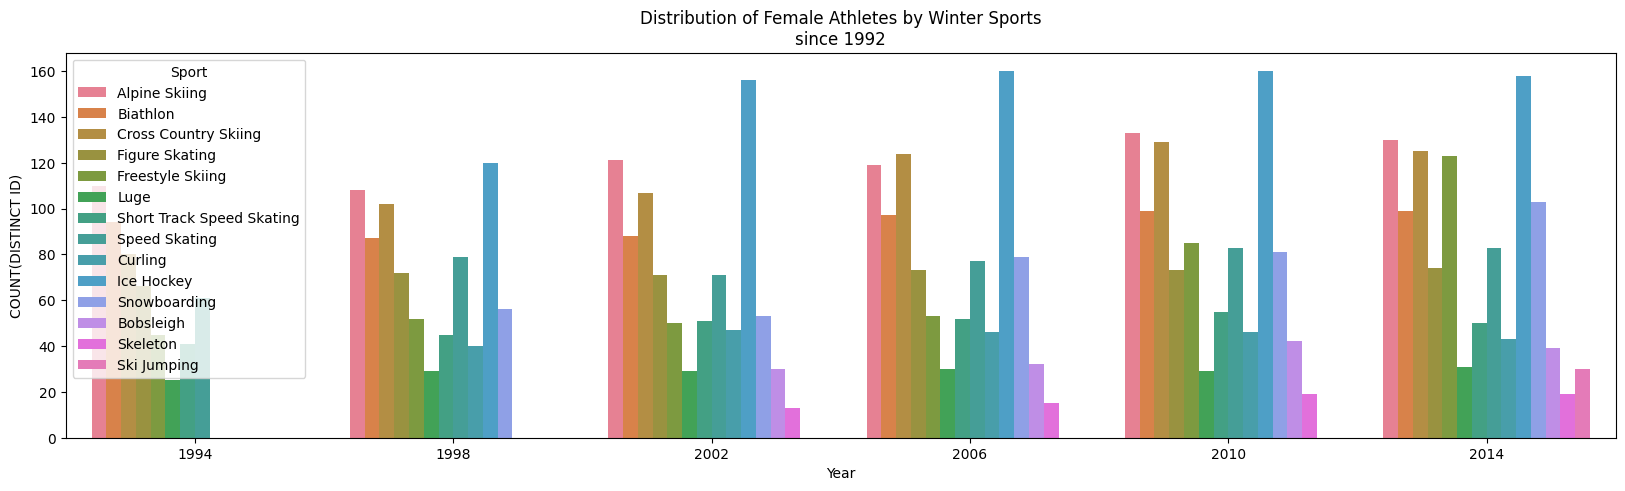

In [129]:
query='''SELECT Sex, Season, Year, Sport, COUNT(DISTINCT ID)
FROM athletes
WHERE Season='Winter' AND Sex='F' AND Year > 1992
GROUP BY Year, Sport
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(20, 5))

sns.barplot(data=df,
             x='Year',
             y='COUNT(DISTINCT ID)',
             hue='Sport',
             )

plt.title("Distribution of Female Athletes by Winter Sports\nsince 1992")
plt.show()

# Female Participation - Winter Games Since 1992
```
The previous graph showed a greater increase in the 
number of female athletes in the winter games after 1990.

This visual breaks down the female participation by sport.
In general, most sports have seen an increase in participation
with hockey seeing a significant increase.  The addition of
Bobsleigh, Skeleton, and Ski Jumping from 1998 on has also 
contributed to the increase of participation.
```


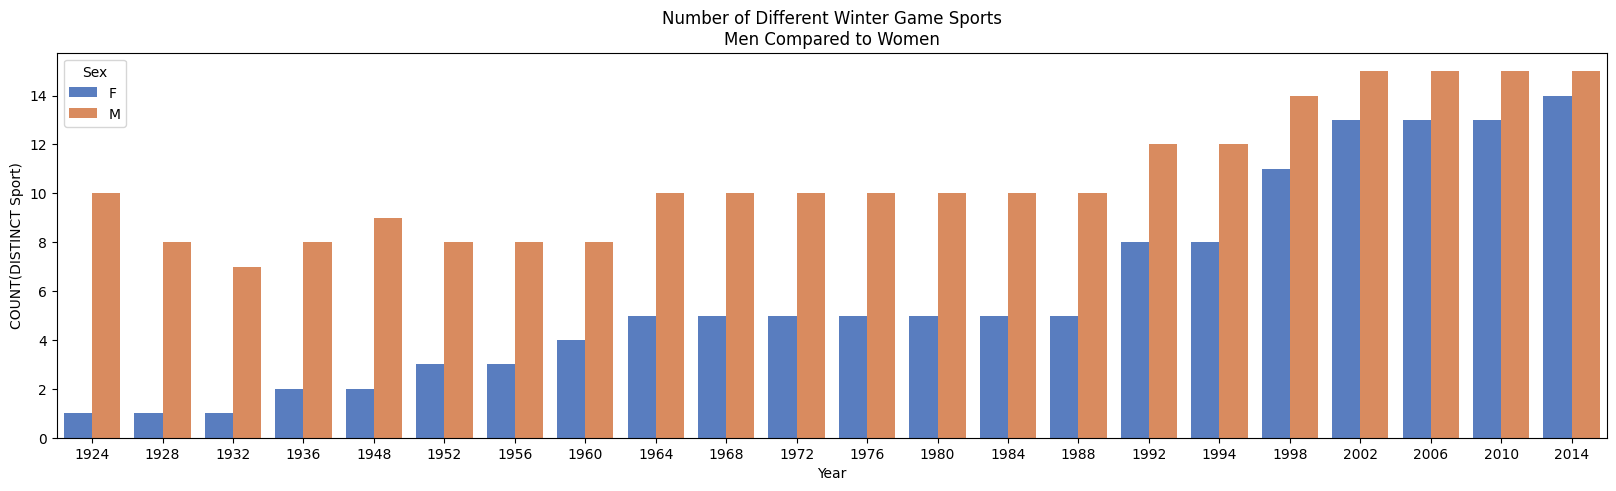

In [133]:
query = '''SELECT DISTINCT Year, Sex, Season, COUNT(DISTINCT Sport)
FROM athletes
WHERE Season='Winter'
GROUP BY Year, Sex
'''

df = pd.read_sql(query, conn)

plt.figure(figsize=(20, 5))
sns.barplot(data=df,
            x='Year',
            y='COUNT(DISTINCT Sport)',
            hue='Sex',
            palette='muted'
            )
plt.title("Number of Unique Sports by Gender\nWinter Games")
plt.show()


# Number of Sports by Gender - Winter Games
```
This visual aims to dig into the gap between the 
number of male athletes to female athletes. This 
shows the number of unique sports with male
athletes compared to the number of unique sports
with female athletes.

The gap of the number of unique sports between
males and females has almost closed from the turn
of the century.
```


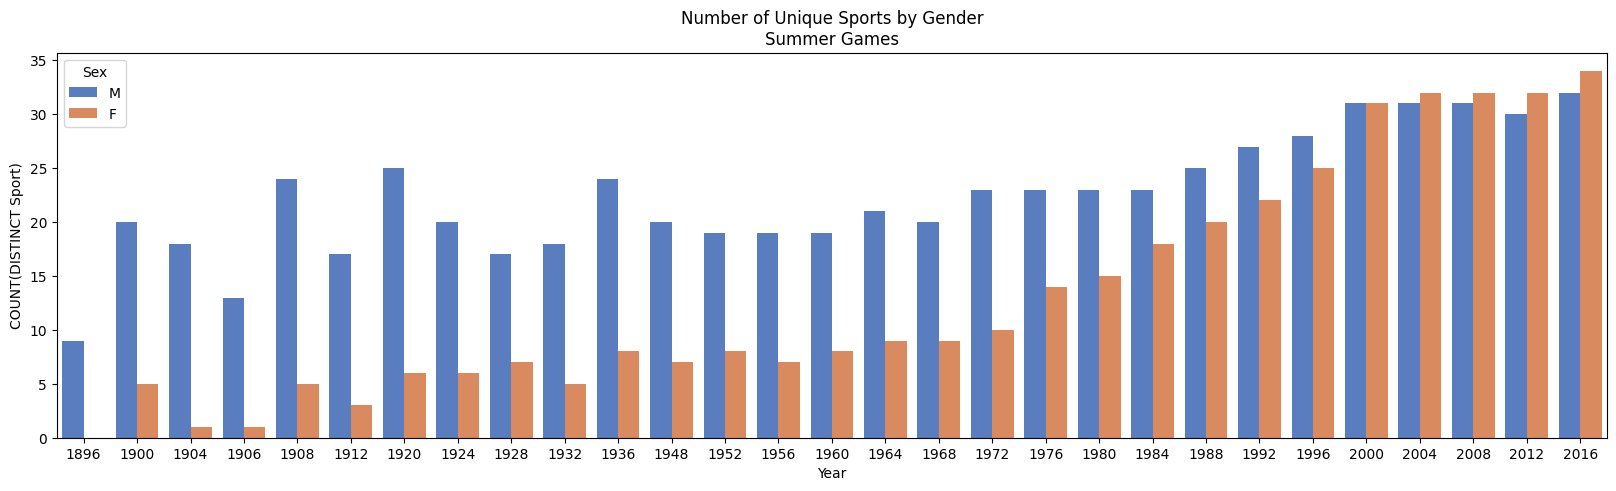

In [134]:
query = '''SELECT DISTINCT Year, Sex, Season, COUNT(DISTINCT Sport)
FROM athletes
WHERE Season='Summer'
GROUP BY Year, Sex
'''

df = pd.read_sql(query, conn)

plt.figure(figsize=(20, 5))
sns.barplot(data=df,
            x='Year',
            y='COUNT(DISTINCT Sport)',
            hue='Sex',
            palette='muted'
            )
plt.title("Number of Unique Sports by Gender\nSummer Games")
plt.show()

# Number of Sports by Gender - Summer Games
```
In looking at the number of unique sports for the summer
games, we can see that the gap has reversed with females
in a larger number of unique sports compared to males.
```

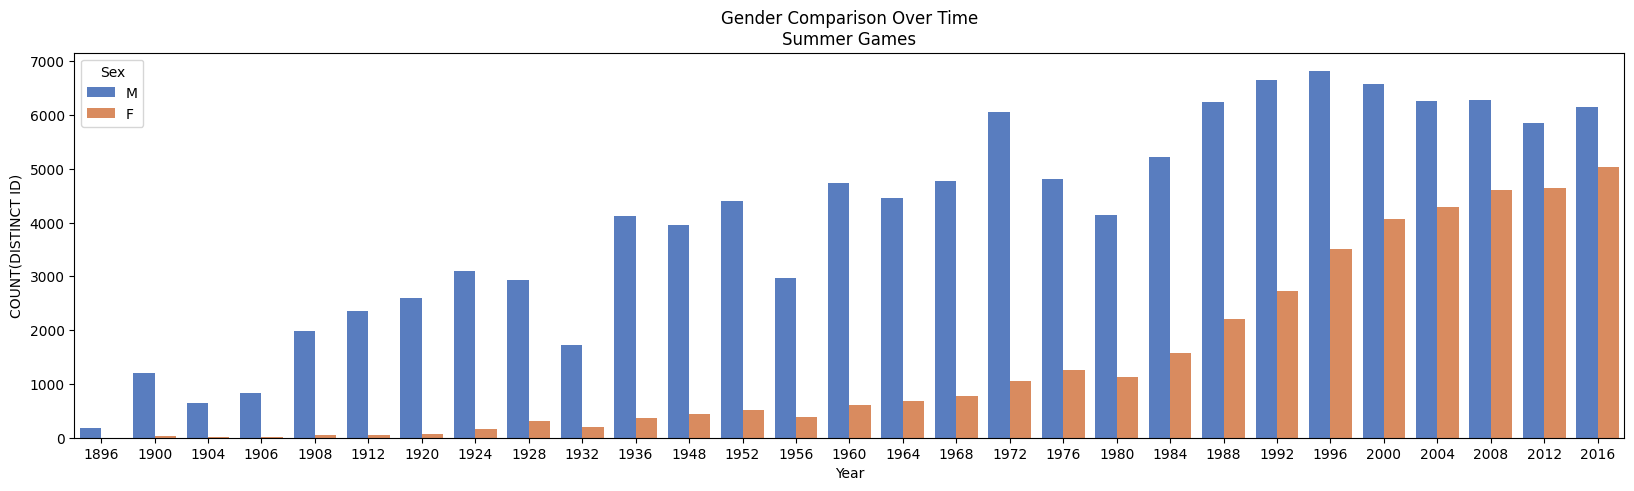

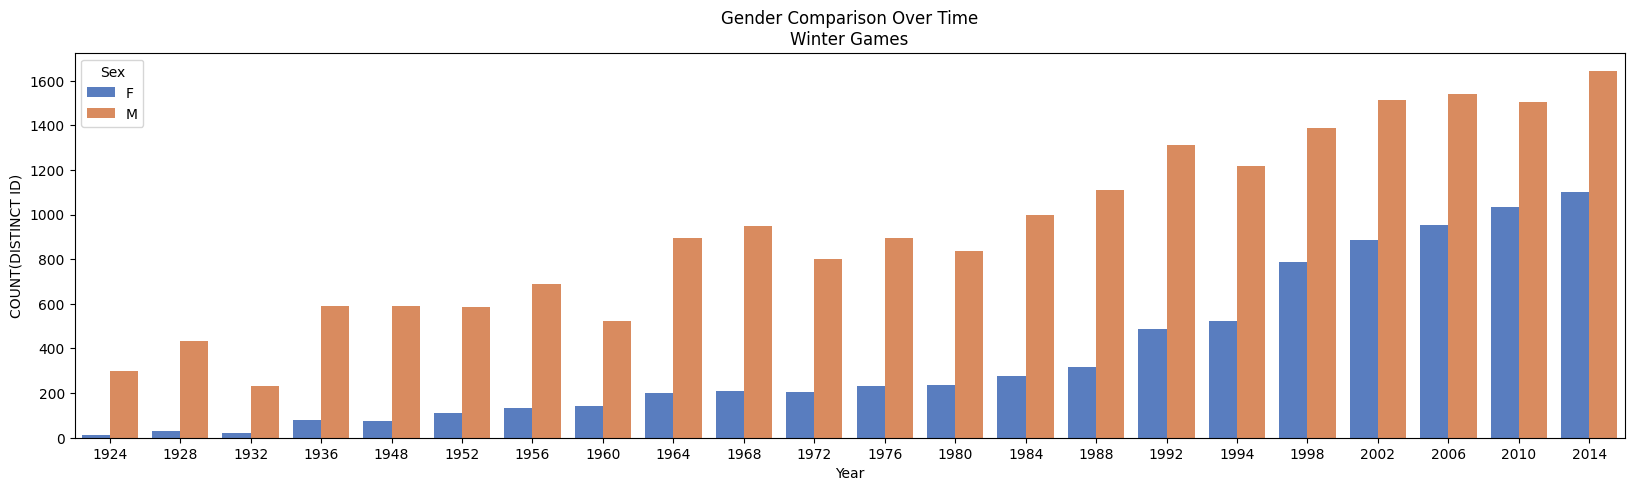

In [135]:
query = '''SELECT year, Sex, COUNT(DISTINCT ID)
FROM athletes
WHERE Season='Summer'
GROUP BY year, Sex
'''

df = pd.read_sql(query, conn)

plt.figure(figsize=(20, 5))
sns.barplot(data=df,
            x='Year',
            y='COUNT(DISTINCT ID)',
            hue='Sex',
            palette='muted'
            )
plt.title("Gender Comparison Over Time\nSummer Games")
plt.show()

query = '''SELECT year, Sex, COUNT(DISTINCT ID)
FROM athletes
WHERE Season='Winter'
GROUP BY year, Sex
'''

df = pd.read_sql(query, conn)
plt.figure(figsize=(20, 5))
sns.barplot(data=df,
            x='Year',
            y='COUNT(DISTINCT ID)',
            hue='Sex',
            palette='muted'
            )
plt.title("Gender Comparison Over Time\nWinter Games")
plt.show()

# Gender Participation Over Time
```
Another view into athlete participation over time, 
comparing males to females.
```

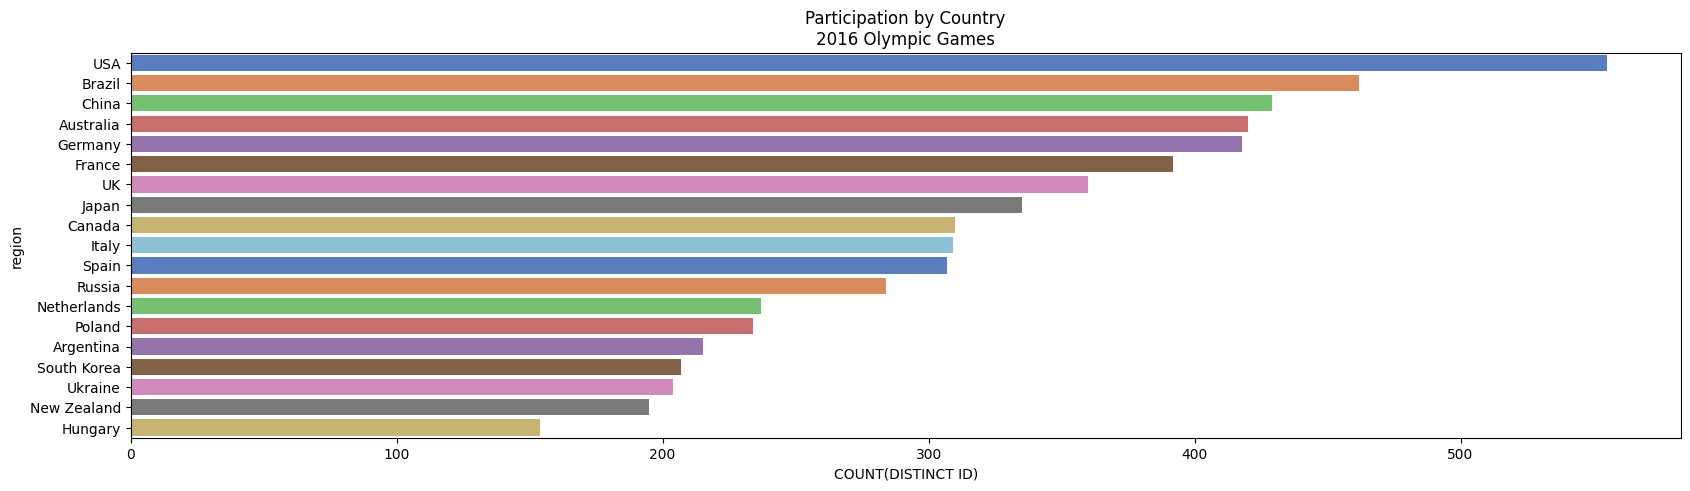

In [31]:
query = '''SELECT year, region, COUNT(DISTINCT ID)
FROM athletes INNER JOIN countries on athletes.noc = countries.noc
GROUP BY year, region
HAVING year = 2016 and COUNT(DISTINCT ID)>150
ORDER BY COUNT(DISTINCT ID) DESC
'''

df = pd.read_sql(query, conn)

plt.figure(figsize=(20, 5))
sns.barplot(data=df,
            x='COUNT(DISTINCT ID)',
            y='region',
            hue='region',
            palette='muted'
            )
plt.title("Participation by Country\n2016 Olympic Games")
plt.show()

# Participation by Country
```
This view shows the countries the largest number of participants 
for the 2016 Olympic games.
```